<div align="center"><h3>HW3, Question 4</h3></div>
<div align="center"><h5>Mohammadreza Ghofrani, 400131076</h5></div>

In [1]:
import cv2
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

# Constants

In [2]:
WINDOW_LENGTH = 8

# Part A

In [3]:
donald = cv2.imread('data/P4/donald.png', cv2.IMREAD_GRAYSCALE)

In [4]:
def patch_extract(image, window_length):
    window_area = window_length**2
    patch_numbers = (image.shape[0]//window_length) * (image.shape[1]//window_length)
    patch = np.zeros((window_area, patch_numbers))
    for i in range(0, len(image), window_length):
        for j in range(0, len(image[i]), window_length):
            i_in_patch, j_in_patch = int(i/window_length), int(j/window_length)
            patch_index = int(i_in_patch * (len(image[i])/window_length) + j_in_patch)
            patch[:, patch_index] = image[i:i+window_length, j:j+window_length].flatten()
    return patch

In [5]:
output = patch_extract(image=donald, window_length=WINDOW_LENGTH)

# Part B

Performing PCA on output from previous part.

In [6]:
mean = np.mean(output, axis=1)[np.newaxis]
output = output - mean.T

number_of_samples = output.shape[1]
scatter = (number_of_samples - 1) * np.cov(output)
eigenvalues, eigenvectors = np.linalg.eig(scatter)

index_of_20_largest_eigenvalues = np.argsort((-1) * eigenvalues)[:20]
top20_eigenvalues = eigenvalues[index_of_20_largest_eigenvalues]
top20_eigenvectors = eigenvectors[:,index_of_20_largest_eigenvalues]

Reporting top 20 eigenvalues and corresponding eigenvectors

In [7]:
with np.printoptions(precision=3, suppress=True):
    for eigenvalue, eigenvector in zip(top20_eigenvalues, top20_eigenvectors.T):
        print("eigenvalue:", eigenvalue)
        print("Corresponding eigenvector:\n", eigenvector)
        print()

eigenvalue: 733409744.9042989
Corresponding eigenvector:
 [-0.121 -0.123 -0.124 -0.124 -0.124 -0.123 -0.122 -0.12  -0.123 -0.124
 -0.125 -0.126 -0.125 -0.125 -0.124 -0.122 -0.124 -0.125 -0.126 -0.127
 -0.127 -0.126 -0.125 -0.123 -0.124 -0.126 -0.127 -0.127 -0.127 -0.127
 -0.126 -0.124 -0.124 -0.125 -0.127 -0.127 -0.127 -0.127 -0.126 -0.124
 -0.123 -0.125 -0.126 -0.127 -0.127 -0.127 -0.125 -0.124 -0.123 -0.125
 -0.126 -0.127 -0.127 -0.126 -0.125 -0.124 -0.122 -0.124 -0.125 -0.126
 -0.126 -0.126 -0.125 -0.123]

eigenvalue: 17738598.790865544
Corresponding eigenvector:
 [ 0.102  0.059  0.008 -0.047 -0.095 -0.137 -0.172 -0.197  0.124  0.08
  0.026 -0.034 -0.089 -0.136 -0.175 -0.2    0.152  0.107  0.051 -0.013
 -0.073 -0.124 -0.166 -0.192  0.178  0.133  0.076  0.012 -0.053 -0.108
 -0.151 -0.181  0.197  0.16   0.102  0.037 -0.025 -0.088 -0.134 -0.165
  0.206  0.175  0.123  0.06  -0.002 -0.065 -0.112 -0.148  0.211  0.187
  0.141  0.083  0.024 -0.038 -0.086 -0.125  0.212  0.19   0.148  0.097
 

Displaying the mean and top 8 eigenvectors

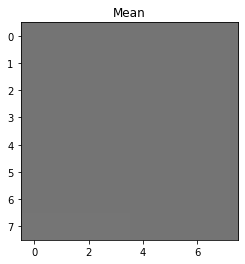

In [8]:
plt.imshow(mean.reshape(WINDOW_LENGTH, WINDOW_LENGTH), cmap=plt.cm.binary, vmin=0, vmax=255)
plt.title('Mean')
# plt.savefig(f'../images/q4/donald/mean.png')
plt.show()

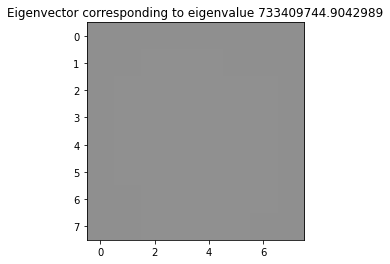

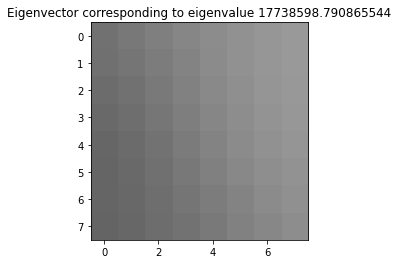

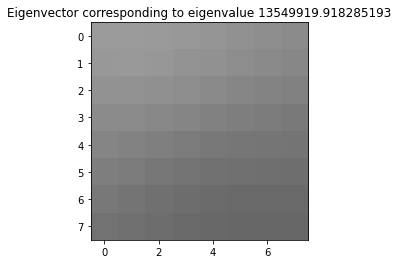

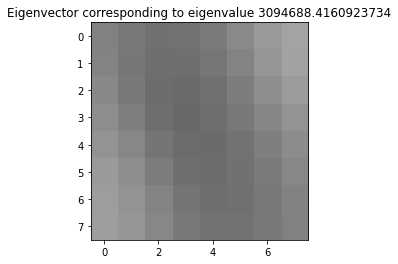

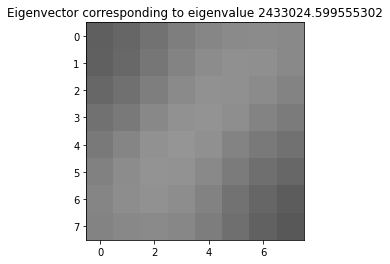

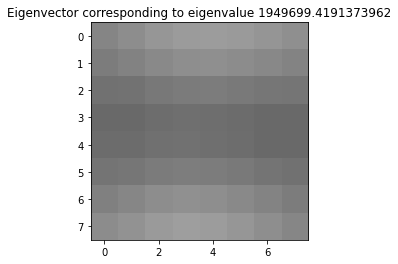

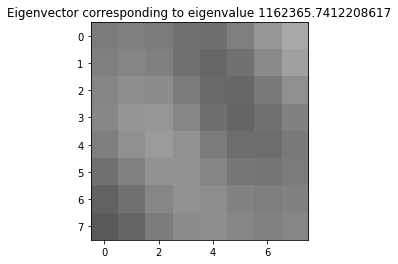

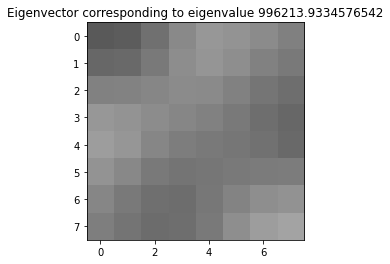

In [9]:
for i in range(8):
    eigenvalue, eigenvector = top20_eigenvalues[i], top20_eigenvectors.T[i]
    plt.imshow(eigenvector.reshape(WINDOW_LENGTH, WINDOW_LENGTH), cmap=plt.cm.binary, vmin=-1, vmax=1)
    plt.title(f'Eigenvector corresponding to eigenvalue {eigenvalue}')
    # plt.savefig(f'../images/q4/donald/eigenvector{i}.png')
    plt.show()

# Part C

In [10]:
compressed_subimage = list()
for k in [2, 5, 10, 20]:
    E = top20_eigenvectors.T[:k]
    compressed_subimage.append(E @ output)

# Part D

In [11]:
uncompressed_subimage = list()
for k, subimage in zip([2, 5, 10, 20], compressed_subimage):
    E = top20_eigenvectors.T[:k]
    uncompressed_subimage.append(E.T @ subimage +  mean.T)

# Part E

In [12]:
def patch_reconstruct(patch, image_shape, window_length):
    image = np.zeros(image_shape)
    for i in range(0, len(image), window_length):
        for j in range(0, len(image[i]), window_length):
            i_in_patch, j_in_patch = int(i/window_length), int(j/window_length)
            patch_index = int(i_in_patch * (len(image[i])/window_length) + j_in_patch)
            image[i:i+window_length, j:j+window_length] = patch[:, patch_index].reshape((window_length, window_length))
    return image

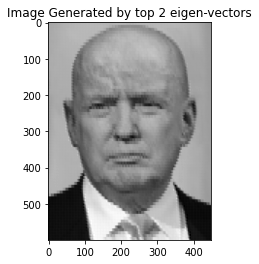

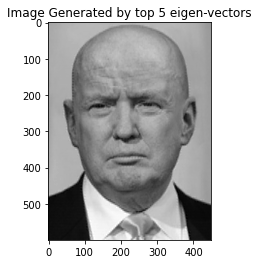

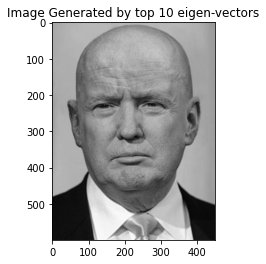

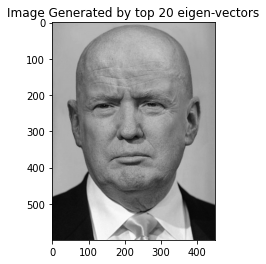

In [13]:
for k, img in zip([2, 5, 10, 20], uncompressed_subimage):
    output_image = patch_reconstruct(img, (600, 448), 8)
    plt.imshow(output_image, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Image Generated by top {k} eigen-vectors')
    # plt.savefig(f'../images/q4/donald/donald_{k}.png')
    plt.show()

# Part F

## Part A

Read joe image

In [96]:
joe = cv2.imread('data/P4/joe.png', cv2.IMREAD_COLOR)
joe = cv2.cvtColor(joe, cv2.COLOR_RGB2BGR)
joe = joe[:,:536]

Extract components of joe's rgb image

In [97]:
blue_joe = joe[:,:,2]
green_joe = joe[:,:,1]
red_joe = joe[:,:,0]

For each component of the joe's image extract patches

In [98]:
blue_output = patch_extract(image=blue_joe, window_length=WINDOW_LENGTH)
green_output = patch_extract(image=green_joe, window_length=WINDOW_LENGTH)
red_output = patch_extract(image=red_joe, window_length=WINDOW_LENGTH)

## Part B

In [17]:
def pca(matrix):
    mean = np.mean(matrix, axis=1)[np.newaxis]
    z = matrix - mean.T

    number_of_samples = z.shape[1]
    scatter = (number_of_samples - 1) * np.cov(z)
    eigenvalues, eigenvectors = np.linalg.eig(scatter)

    return eigenvalues, eigenvectors, mean

In [59]:
blue_eigenvalue, blue_eigenvectors, blue_mean = pca(blue_output)
green_eigenvalue, green_eigenvectors, green_mean = pca(green_output)
red_eigenvalue, red_eigenvectors, red_mean = pca(red_output)

blue_top20eigenvalue, blue_top20eigenvectors = blue_eigenvalue[:20], blue_eigenvectors[:,:20]
green_top20eigenvalue, green_top20eigenvectors = green_eigenvalue[:20], green_eigenvectors[:, :20]
red_top20eigenvalue, red_top20eigenvectors = red_eigenvalue[:20], red_eigenvectors[:, :20]

Reporting top 20 eigenvalues and corresponding eigenvectors

In [64]:
with np.printoptions(precision=3, suppress=True):
    for top20_eigenvalues, top20_eigenvectors in [(blue_top20eigenvalue, blue_top20eigenvectors.T), (green_top20eigenvalue, green_top20eigenvectors.T), (red_top20eigenvalue, red_top20eigenvectors.T)]:
        for eigenvalue, eigenvector in zip(top20_eigenvalues, top20_eigenvectors):
            print("eigenvalue:", eigenvalue)
            print("Corresponding eigenvector:\n", eigenvector)
            print()

eigenvalue: 1820056092.0965662
Corresponding eigenvector:
 [-0.123 -0.124 -0.125 -0.125 -0.125 -0.125 -0.125 -0.124 -0.123 -0.124
 -0.125 -0.126 -0.126 -0.126 -0.125 -0.124 -0.124 -0.125 -0.126 -0.126
 -0.126 -0.126 -0.126 -0.125 -0.124 -0.125 -0.126 -0.126 -0.127 -0.126
 -0.126 -0.125 -0.124 -0.125 -0.126 -0.126 -0.126 -0.126 -0.126 -0.125
 -0.124 -0.125 -0.126 -0.126 -0.126 -0.126 -0.125 -0.124 -0.123 -0.124
 -0.125 -0.125 -0.126 -0.125 -0.125 -0.124 -0.123 -0.124 -0.124 -0.125
 -0.125 -0.125 -0.124 -0.123]

eigenvalue: 25992664.426361356
Corresponding eigenvector:
 [ 0.16   0.118  0.066  0.014 -0.039 -0.093 -0.141 -0.171  0.178  0.133
  0.074  0.019 -0.04  -0.097 -0.148 -0.178  0.188  0.145  0.084  0.025
 -0.036 -0.1   -0.153 -0.184  0.19   0.152  0.093  0.032 -0.034 -0.1
 -0.156 -0.19   0.188  0.153  0.101  0.038 -0.027 -0.095 -0.156 -0.191
  0.186  0.152  0.103  0.043 -0.019 -0.09  -0.151 -0.188  0.178  0.147
  0.1    0.046 -0.013 -0.078 -0.138 -0.174  0.171  0.141  0.094  0.044
 

## Part C

In [103]:
blue_compressed_subimage = list()
for k in [2, 5, 10, 20]:
    E = blue_top20eigenvectors.T[:k]
    blue_compressed_subimage.append(E @ (blue_output - blue_mean.T))

In [104]:
green_compressed_subimage = list()
for k in [2, 5, 10, 20]:
    E = green_top20eigenvectors.T[:k]
    green_compressed_subimage.append(E @ (green_output - green_mean.T))

In [105]:
red_compressed_subimage = list()
for k in [2, 5, 10, 20]:
    E = red_top20eigenvectors.T[:k]
    red_compressed_subimage.append(E @ (red_output - red_mean.T))

## Part D

In [106]:
blue_uncompressed_subimage = list()
for k, subimage in zip([2, 5, 10, 20], blue_compressed_subimage):
    E = blue_top20eigenvectors.T[:k]
    blue_uncompressed_subimage.append(E.T @ subimage + blue_mean.T)

In [107]:
green_uncompressed_subimage = list()
for k, subimage in zip([2, 5, 10, 20], green_compressed_subimage):
    E = green_top20eigenvectors.T[:k]
    green_uncompressed_subimage.append(E.T @ subimage + green_mean.T)

In [108]:
red_uncompressed_subimage = list()
for k, subimage in zip([2, 5, 10, 20], red_compressed_subimage):
    E = red_top20eigenvectors.T[:k]
    red_uncompressed_subimage.append(E.T @ subimage + red_mean.T)

## Part E

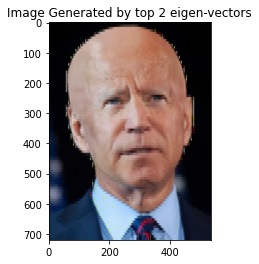

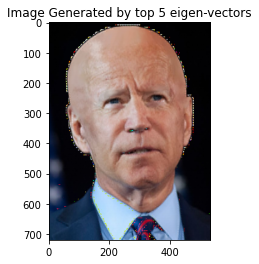

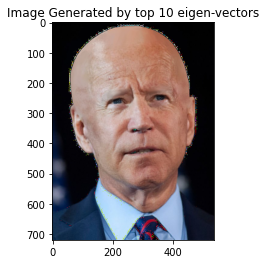

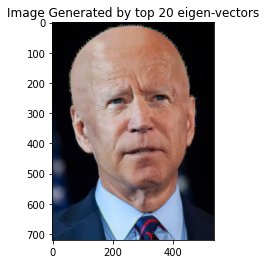

In [110]:
for k, blue_img, green_img, red_img in zip([2, 5, 10, 20], blue_uncompressed_subimage, green_uncompressed_subimage, red_uncompressed_subimage):
    blue_output_image = patch_reconstruct(blue_img, (720, 536), 8)
    green_output_image = patch_reconstruct(green_img, (720, 536), 8)
    red_output_image = patch_reconstruct(red_img, (720, 536), 8)
    output_image = np.dstack([red_output_image, green_output_image, blue_output_image]).astype(np.uint8)
    plt.imshow(output_image, vmin=0, vmax=255)
    plt.title(f'Image Generated by top {k} eigen-vectors')
    # plt.savefig(f'../images/q4/joe/joe_{k}')
    plt.show()